<a href="https://colab.research.google.com/github/crazypinkmonkey/codeafterdark/blob/main/Playing_PennyLane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pennylane --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 84.7 MB/s eta 0:00:00


#1 Qubit Quantum Classifier

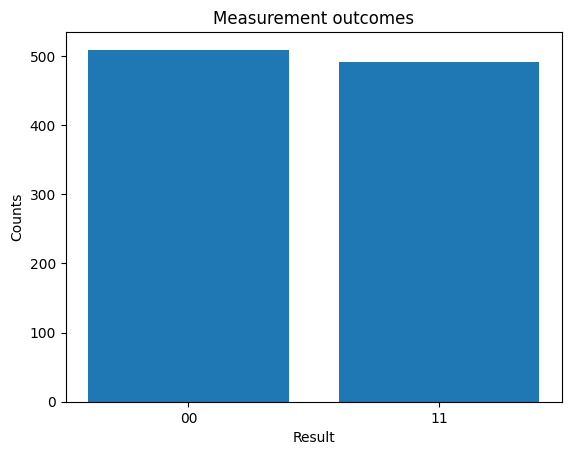

In [4]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Create a 2-qubit device
dev = qml.device("default.qubit", wires=2, shots=1000)

# Define the quantum circuit
@qml.qnode(dev)
def bell_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(wires=[0, 1])

# Run the circuit
samples = bell_circuit()

# Count results
from collections import Counter
counts = Counter(tuple(s) for s in samples)

# Plot
labels = [''.join(map(str, k)) for k in counts.keys()]
values = list(counts.values())

plt.bar(labels, values)
plt.title("Measurement outcomes")
plt.xlabel("Result")
plt.ylabel("Counts")
plt.show()


In [9]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit(weights, x):
  qml.RX(x[0], wires=0)
  qml.RY(x[1], wires=0)
  qml.Rot(weights[0], weights[1], weights[2], wires=0)
  return qml.expval(qml.PauliZ(0))

def classify(X, weights):
  result = circuit(weights, X)
  return 0 if result > 0 else 1

In [10]:
weights = np.array([0.5, 0.1, -0.3], requires_grad=True)

X = [np.array([0.1, 0.2]), np.array([3.0, 2.5])]

for x in X:
  y_pred = classify(x, weights)
  print(f"Input: {X}, Prediction: {y_pred}")

Input: [tensor([0.1, 0.2], requires_grad=True), tensor([3. , 2.5], requires_grad=True)], Prediction: 0
Input: [tensor([0.1, 0.2], requires_grad=True), tensor([3. , 2.5], requires_grad=True)], Prediction: 0


In [14]:
X = np.array([[0.1, 0.2], [3.0, 2.5]], requires_grad=True)
Y = np.array([0, 1])

In [15]:
def loss(weights, X, Y):
  loss = 0
  for i in range(len(X)):
    pred = circuit(weights, X[i])
    loss += (pred - (1 - 2*Y[i]))**2
  return loss / len(X)

In [17]:
weights = np.array([0.5, 0.1, -0.3], requires_grad=True)
opt = qml.GradientDescentOptimizer(stepsize=0.4)

for step in range(30):
  weights = opt.step(lambda w: loss(w, X, Y), weights)
  current_loss = loss(weights, X, Y)
  print(f"Step {step+1}: Loss = {current_loss:.4f}")

Step 1: Loss = 1.4489
Step 2: Loss = 1.0093
Step 3: Loss = 0.5266
Step 4: Loss = 0.3793
Step 5: Loss = 0.3657
Step 6: Loss = 0.3613
Step 7: Loss = 0.3584
Step 8: Loss = 0.3566
Step 9: Loss = 0.3553
Step 10: Loss = 0.3545
Step 11: Loss = 0.3540
Step 12: Loss = 0.3536
Step 13: Loss = 0.3534
Step 14: Loss = 0.3532
Step 15: Loss = 0.3531
Step 16: Loss = 0.3530
Step 17: Loss = 0.3530
Step 18: Loss = 0.3530
Step 19: Loss = 0.3529
Step 20: Loss = 0.3529
Step 21: Loss = 0.3529
Step 22: Loss = 0.3529
Step 23: Loss = 0.3529
Step 24: Loss = 0.3529
Step 25: Loss = 0.3529
Step 26: Loss = 0.3529
Step 27: Loss = 0.3529
Step 28: Loss = 0.3529
Step 29: Loss = 0.3529
Step 30: Loss = 0.3529


In [19]:
for x in X:
  pred = classify(x, weights)
  print(f"Input: {X}, Prediction: {pred}")

Input: [[0.1 0.2]
 [3.  2.5]], Prediction: 0
Input: [[0.1 0.2]
 [3.  2.5]], Prediction: 1


#2 Qubit Quantum Neural Network (QNN)

In [20]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def qnn(weights, X):
  qml.RX(x[0], wires=0)
  qml.RY(x[1], wires=1)

  qml.Rot(*weights[0], wires=0)
  qml.Rot(*weights[1], wires=1)

  qml.CNOT(wires=[0, 1])

  qml.Rot(*weights[2], wires=0)
  qml.Rot(*weights[3], wires=1)

  return qml.expval(qml.PauliZ(0))


In [21]:
def loss(weights, X, Y):
  loss = 0
  for i in range(len(X)):
    pred = qnn(weights, X[i])
    loss += (pred - (1 - 2*Y[i]))**2
  return loss / len(X)

def classify(x, weights):
  return 0 if qnn(weights, x) > 0 else 1

In [23]:
X = np.array([[0.1, 0.2], [3.0, 2.5]], requires_grad=True)
Y = np.array([0, 1])

weights = np.random.randn(4, 3, requires_grad=True)

opt = qml.GradientDescentOptimizer(stepsize=0.3)

for step in range(30):
  weights = opt.step(lambda w: loss(w, X, Y), weights)
  current_loss = loss(weights, X, Y)
  print(f"Step {step+1}: Loss = {current_loss:.4f}")

Step 1: Loss = 1.0593
Step 2: Loss = 1.0024
Step 3: Loss = 1.0001
Step 4: Loss = 1.0000
Step 5: Loss = 1.0000
Step 6: Loss = 1.0000
Step 7: Loss = 1.0000
Step 8: Loss = 1.0000
Step 9: Loss = 1.0000
Step 10: Loss = 1.0000
Step 11: Loss = 1.0000
Step 12: Loss = 1.0000
Step 13: Loss = 1.0000
Step 14: Loss = 1.0000
Step 15: Loss = 1.0000
Step 16: Loss = 1.0000
Step 17: Loss = 1.0000
Step 18: Loss = 1.0000
Step 19: Loss = 1.0000
Step 20: Loss = 1.0000
Step 21: Loss = 1.0000
Step 22: Loss = 1.0000
Step 23: Loss = 1.0000
Step 24: Loss = 1.0000
Step 25: Loss = 1.0000
Step 26: Loss = 1.0000
Step 27: Loss = 1.0000
Step 28: Loss = 1.0000
Step 29: Loss = 1.0000
Step 30: Loss = 1.0000


In [24]:
for x in X:
  pred = classify(x, weights)
  print(f"Input: {x}, Prediction: {pred}")

Input: [0.1 0.2], Prediction: 0
Input: [3.  2.5], Prediction: 1
